# Data Analyst Job EDA

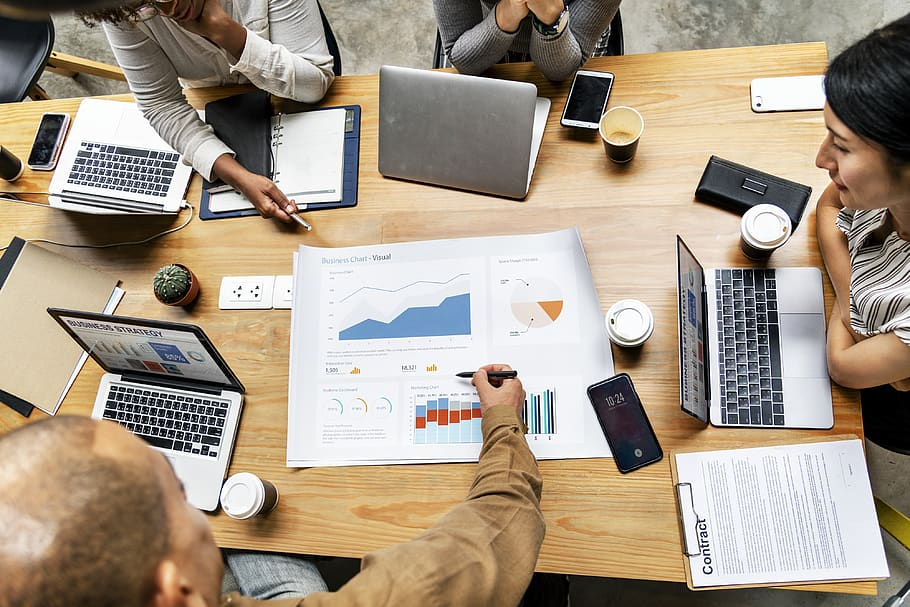

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
!pip install chart-studio
import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

     |████████████████████████████████| 64 kB 1.2 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the data


In [2]:
# reading .csv file
df=pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(2253, 15)

Lets take a look at the Data

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


Dataframe.describe(include='all'), gives us all the required descriptive stats
which include
1. the total number of non NULL values.
2. If it is a categorical variable, the number of unique values in it.
3. Most frequent value in the categorical variable.
4. Descriptive statistics like minimum, maximum, mean, standard deviation, (25-50-75) quantiles.

In [4]:
df.describe(include='all')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2253,2253,2253,2253.000000,2252,2253,2253,2253,2253.000000,2253,2253,2253,2253,2253,2253
unique,1272,90,2253,NaN,1513,253,483,9,NaN,15,89,25,14,291,2
top,Data Analyst,$42K-$76K (Glassdoor est.),About the company\n\nRobinhood is democratizin...,NaN,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,405,57,1,NaN,58,310,206,421,NaN,1273,353,570,615,1732,2173
mean,NaN,NaN,NaN,3.160630,NaN,NaN,NaN,NaN,1398.522858,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.665228,NaN,NaN,NaN,NaN,901.929251,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def miss_val(df):
    #number of missing values
    miss_val = df.isnull().sum()
    
    #percent missing values
    miss_val_per = miss_val/ len(df)*100
    
    #creating df with the results
    miss_val_df = pd.concat([miss_val, miss_val_per], axis=1)
    
    #renaming the columns
    miss_val_df = miss_val_df.rename(columns = {0 : 'missing_values', 1 : '%_of_total_values'})
    
    #sorting the table
    miss_val_df=miss_val_df[miss_val_df['missing_values']!=0]
    miss_val_df = miss_val_df.sort_values('%_of_total_values', ascending=False)
    return miss_val_df

In [6]:
miss_val(df)

,missing_values,%_of_total_values
Company Name,1,0.044385


In [7]:
df['Job Title'].value_counts()

Data Analyst                                      405
Senior Data Analyst                                90
Junior Data Analyst                                30
Business Data Analyst                              28
Sr. Data Analyst                                   21
                                                 ... 
Data Entry and compliance Analyst                   1
Business Analyst (Data Integration/Salesforce)      1
Human Performance Data Analyst                      1
Data Analyst -0517 Suv                              1
Sr. Data Analyst - Analytics, Marketing, CPG        1
Name: Job Title, Length: 1272, dtype: int64

few Job Title got two sections,(The job title and the department) which is separated by ",".

creating two columns by splitting the "Job Title"

In [8]:
#1 is given as max split i.e split only once
df['Job Title'],df['Department']=df['Job Title'].str.split(',', 1).str
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department
0,Data Analyst,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,Center on Immigration and Justice (CIJ)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NaN
2,Senior Data Analyst,$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,Insights & Analytics Team [Customer Operations]
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN


In [9]:
df['Industry'].value_counts().head(10)

-1                                         353
IT Services                                325
Staffing & Outsourcing                     323
Health Care Services & Hospitals           151
Consulting                                 111
Computer Hardware & Software               111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Internet                                    65
Advertising & Marketing                     51
Name: Industry, dtype: int64

### Observations
-1 Indicates null values.

lets explore other columns as well to see if there are such null values(in disguise).

In [10]:
df['Sector'].value_counts().head(10)

Information Technology    570
Business Services         524
-1                        353
Finance                   169
Health Care               151
Education                  52
Insurance                  51
Accounting & Legal         43
Media                      42
Manufacturing              40
Name: Sector, dtype: int64

In [11]:
df['Competitors'].value_counts().head(10)

-1                                                      1732
Robert Half, Insight Global                               14
Adecco, Manpower                                          14
Artech Information Systems, Mindlance, Tech Mahindra      10
Google, Microsoft, Samsung Electronics                    10
TEKsystems, Insight Global, Accenture                     10
Adecco, Kforce                                             9
State Street, Northern Trust, BlackRock                    9
Accenture, CGI, Sopra Steria                               7
Kforce, Insight Global, Volt Consulting Group              7
Name: Competitors, dtype: int64

In [12]:
df['Easy Apply'].value_counts().head(10)

-1      2173
True      80
Name: Easy Apply, dtype: int64

In [13]:
df['Revenue'].value_counts().head(10)

Unknown / Non-Applicable      615
$100 to $500 million (USD)    218
$50 to $100 million (USD)     199
$10+ billion (USD)            189
-1                            163
$10 to $25 million (USD)      132
$2 to $5 billion (USD)        129
$1 to $5 million (USD)        111
$25 to $50 million (USD)      110
Less than $1 million (USD)     93
Name: Revenue, dtype: int64

### Observations
Similar to the column "Industry", all these columns ("Sector","Competitor","Easy Apply","Revenue") has -1 as the null value.

replacing -1 with null values

In [14]:
num_lst=[-1,-1.0,'-1']
for num in num_lst:
    df=df.replace(num,np.nan)

In [15]:
df['Salary Estimate'].value_counts().head(10)

$42K-$76K (Glassdoor est.)     57
$41K-$78K (Glassdoor est.)     57
$50K-$86K (Glassdoor est.)     41
$35K-$67K (Glassdoor est.)     33
$43K-$76K (Glassdoor est.)     31
$60K-$124K (Glassdoor est.)    31
$58K-$93K (Glassdoor est.)     31
$35K-$42K (Glassdoor est.)     30
$60K-$66K (Glassdoor est.)     30
$46K-$86K (Glassdoor est.)     30
Name: Salary Estimate, dtype: int64

### Observations
"Salary Estimate" has a lot of special characters and text, we only need the estimated number(in integer format).

Removing text(Glassdoor est. ,$, K, -) from the column and splitting it into two columns max and min salary.

In [16]:
df['Salary Estimate'],_=df['Salary Estimate'].str.split('(', 1).str
df['salary_min'],df['salary_max']=df['Salary Estimate'].str.split('-').str
df['salary_max']=df['salary_max'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
df['salary_min']=df['salary_min'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
df.drop('Salary Estimate',axis=1,inplace=True)

In [17]:
df['Size'].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

Removing "employees" from the "Size".

In [18]:
df['Size'],_=df['Size'].str.split(" e").str

In [19]:
df['Company Name'].value_counts().head(5)

Staffigo Technical Services, LLC\n5.0    58
Diverse Lynx\n3.9                        22
Lorven Technologies Inc\n4.0             19
Kforce\n4.1                              19
Robert Half\n3.5                         14
Name: Company Name, dtype: int64

### Observations
"Company Name" has its rating after "\n", which is not required as we already have a Rating column

Removing excess text and only recover company information. 

In [20]:
df['Company Name'],_=df['Company Name'].str.split('\n', 1).str

"Location" has city and state information.

Splitting it into two individual columns("State", "City")

In [21]:
df['City'],df['State']=df['Location'].str.split(', ', 1).str
df['State']=df['State'].replace("Arapahoe, CO","CO")
df.drop('Location',axis=1,inplace=True)
df.head()

,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,salary_min,salary_max,City,State
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ),37,66,New York,NY
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",10000+,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,NaN,37,66,New York,NY
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",1001 to 5000,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,Insights & Analytics Team [Customer Operations],37,66,New York,NY
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"McLean, VA",201 to 500,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,NaN,37,66,New York,NY
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",501 to 1000,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66,New York,NY


## Imputing

filling na's.

as model building is not the motive of this Kernel, na's are filled with "Unknown" or 0.

In [22]:
df['Size'].fillna('Unknown',inplace=True)

df['Founded']=df['Founded'].fillna("0").astype(int)

df['Type of ownership'].fillna('Unknown',inplace=True)

df['Sector'].fillna('Unknown',inplace=True)

df['Easy Apply']=df['Easy Apply'].fillna("False").astype("bool")

Creating a function which will output the maximum Revenue of the company from column "Revenue".

In [23]:
def filter_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000
    return revenue

In [24]:
df['Max_revenue']=df['Revenue'].apply(lambda x: filter_revenue(x))
df.head()

,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,salary_min,salary_max,City,State,Max_revenue
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ),37,66,New York,NY,500.0
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,True,NaN,37,66,New York,NY,5000.0
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",1001 to 5000,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,True,Insights & Analytics Team [Customer Operations],37,66,New York,NY,0.0
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"McLean, VA",201 to 500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,True,NaN,37,66,New York,NY,100.0
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",501 to 1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66,New York,NY,500.0


Creating a WordCloud of JobTitle. It gives us a high level view of current trend of Data Analyst jobs

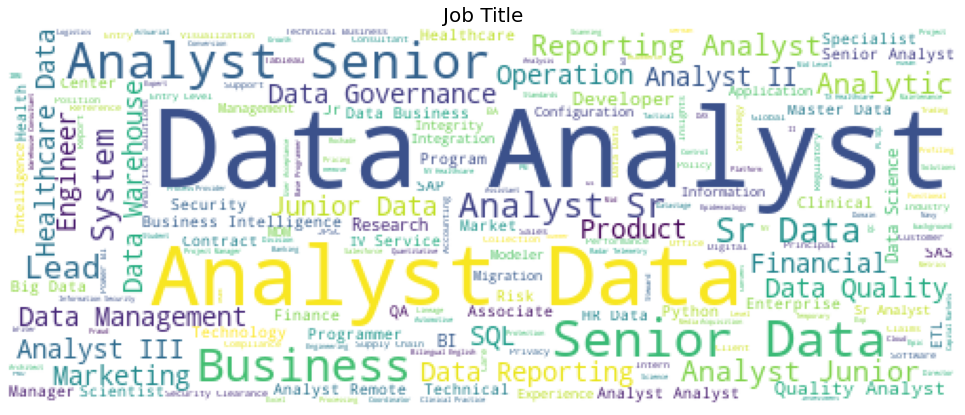

In [25]:
job_title=df['Job Title'][~pd.isnull(df['Job Title'])]
wordCloud = WordCloud(background_color='white',width=500,height= 200).generate(' '.join(job_title))
plt.figure(figsize=(20,7))
plt.axis('off')
plt.title(df['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [26]:
# Removing stopwords
def removing_stopwords(text):
   #removing some important stopwords from stopwords
    Stopwords=set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in Stopwords])

Removing stop words from the description as when the Wordcloud is created, because of high frequency of stop words like(from,the,a,and,an,on), they will be given higher priority(which has no importance)


In [27]:
#removing stopwords
df['Job Description']=df['Job Description'].apply(lambda text:removing_stopwords(text))

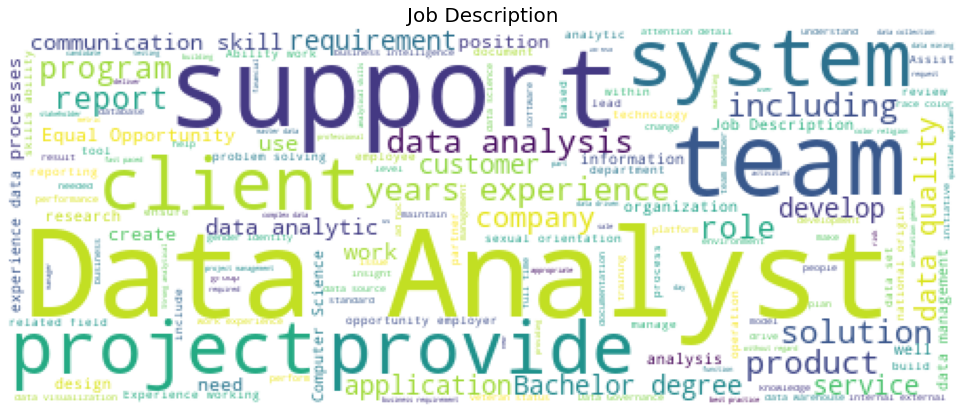

In [28]:
Job_Description=df['Job Description'][~pd.isnull(df['Job Description'])]
wordCloud = WordCloud(background_color='white',width=500,height= 200).generate(' '.join(Job_Description))
plt.figure(figsize=(20,7))
plt.axis('off')
plt.title(df['Job Description'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [29]:
pg_lan = ["python","c++","java","matlab",".net","c#","javascript","html","bash"]
big_data = ["big data","hadoop","spark","impala","cassandra","kafka","hdfs","hbase","hive"]
job = df["Job Description"].tolist()
job = [x.lower() for x in job]

In [30]:
pg_lan_required = defaultdict()
for item in pg_lan:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    pg_lan_required[item] = counter

pg_lan_df = pd.DataFrame(list(pg_lan_required.items()),columns = ['Programming Langauge','count']) 
pg_lan_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

Finding out important programming languages and Big data technologies that companies seek from the applicants

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text major ticklabel objects>)

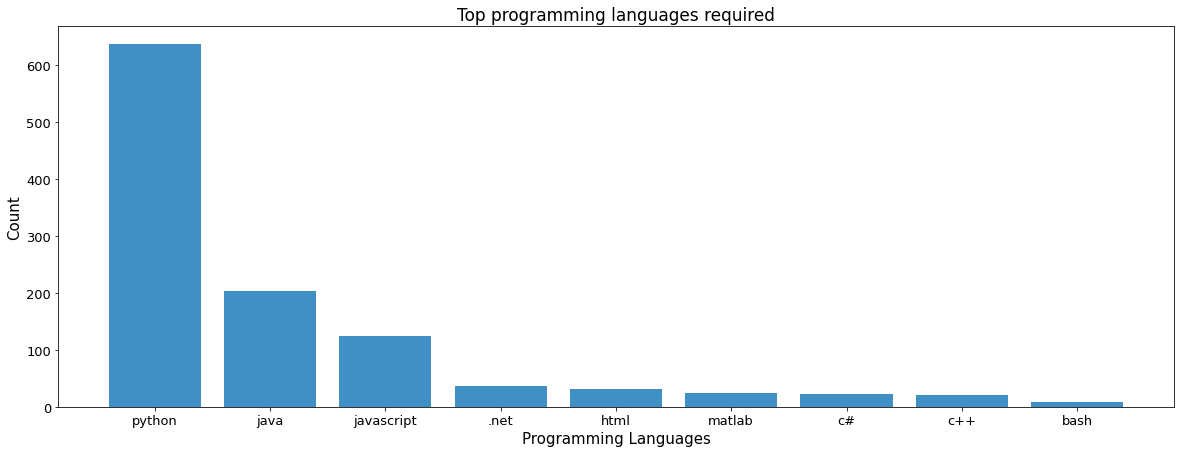

In [31]:
plt.figure(figsize = (20,7))
x = pg_lan_df["Programming Langauge"]
y = pg_lan_df["count"]
plt.bar(x,y,color= "#4090c5")
plt.title("Top programming languages required",fontsize=17)
plt.xlabel("Programming Languages",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

Python, java, javascript are the top programming languages in the Industry. 

In [32]:
counter = 0
big_data_required = defaultdict()
for item in big_data:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    big_data_required[item] = counter

big_data_df = pd.DataFrame(list(big_data_required.items()),columns = ['Big Data Technologies','count']) 
big_data_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text major ticklabel objects>)

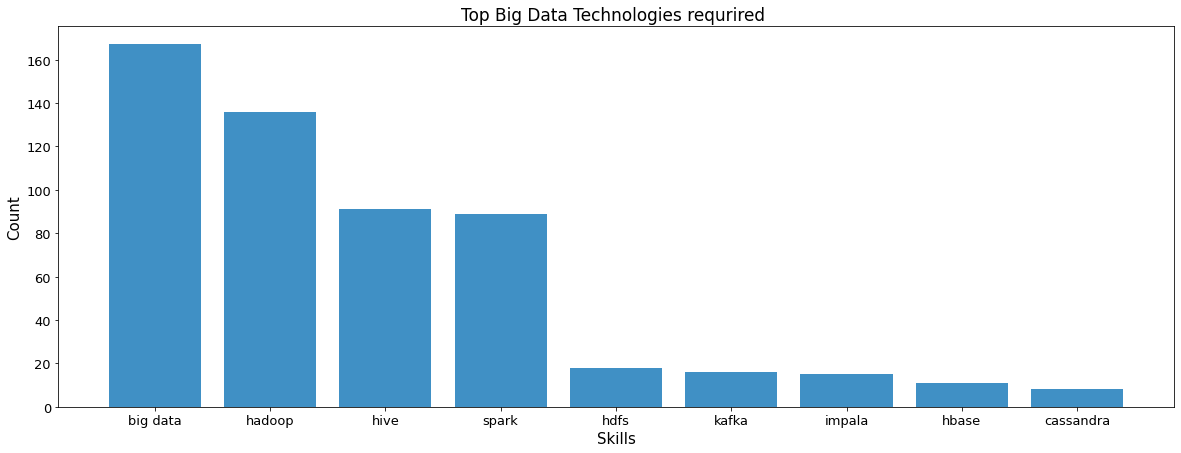

In [33]:
plt.figure(figsize = (20,7))
x = big_data_df["Big Data Technologies"]
y = big_data_df["count"]
plt.bar(x,y,color= "#4090c5")
plt.title("Top Big Data Technologies requrired ",fontsize=17)
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

How the companies stand on the rating scale


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

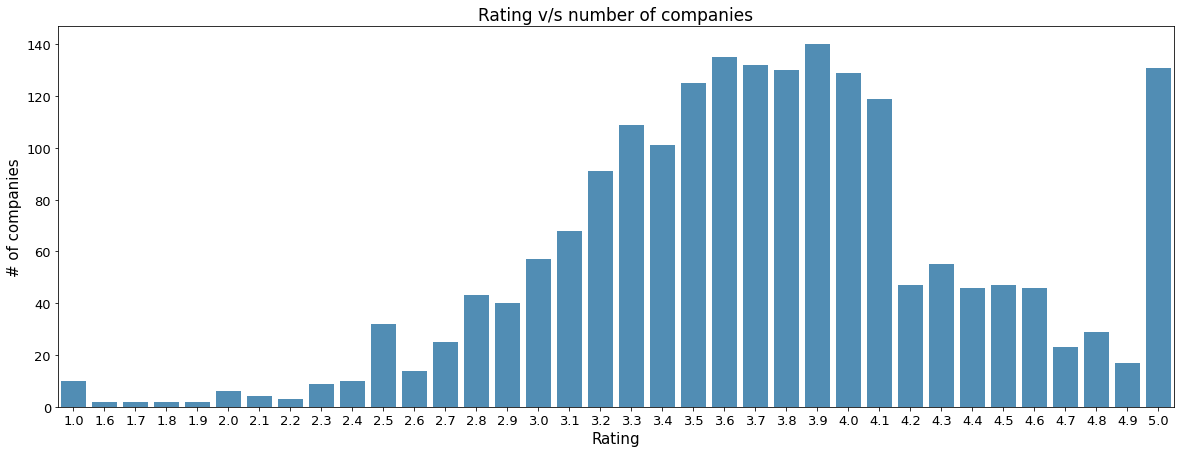

In [34]:
plt.figure(figsize=(20,7))
sns.countplot(df['Rating'],color='#4090c5')
plt.xlabel("Rating",fontsize=15)
plt.ylabel("# of companies",fontsize=15)
plt.title("Rating v/s number of companies",fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [35]:
statewise_count=pd.DataFrame(df.groupby('State').count().iloc[:,1]).reset_index()


data = dict(type='choropleth',
            locations = statewise_count['State'],
            locationmode = 'USA-states',
            colorscale='blues',
            z = statewise_count['Job Description'],
            colorbar = {'title':"number of jobs"}
            )

layout = dict(title = 'Data Analyst jobs per state',geo = dict(scope='usa'))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

### Observations
California, Texas and NewYork are the top 3 states which have highest Data Analyst requirement.

In [36]:
salary_df=df.copy()
salary_df['mean_salary']=(df['salary_max']+df['salary_min'])/2
state_salary=pd.DataFrame(salary_df.groupby('State')['mean_salary'].mean()).reset_index()
state_salary

data = dict(type='choropleth',
            locations = state_salary['State'],
            locationmode = 'USA-states',
            colorscale = 'blues',
            z = state_salary['mean_salary'],
            colorbar = {'title':"salary"}
            )

layout = dict(title = 'mean salary based on state',geo = dict(scope='usa'))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

### Observations
California, Illinois, Colorado are the top 3 states with highest mean salary for Data Analyst.

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 ]),
 <a list of 7 Text major ticklabel objects>)

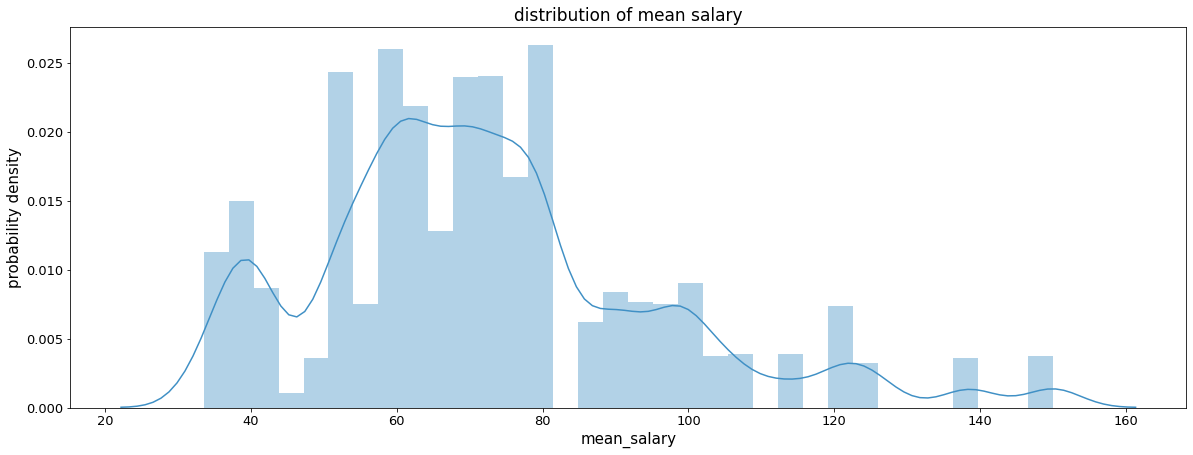

In [37]:
plt.figure(figsize=(20,7))
sns.distplot(salary_df.loc[salary_df['mean_salary']!=0,'mean_salary'],color="#4090c5")
plt.xlabel('mean_salary',fontsize=15)
plt.ylabel('probability density',fontsize=15)
plt.title('distribution of mean salary',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [38]:
temp_df=salary_df[salary_df['Max_revenue']!=0]
size_revenue=pd.DataFrame(temp_df.groupby('Size')['mean_salary'].mean().sort_values()).reset_index()

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

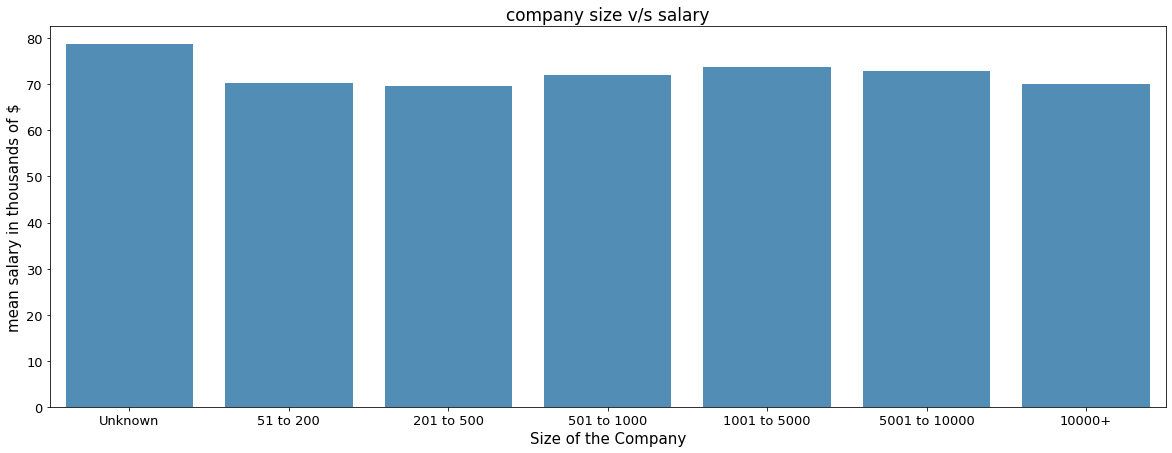

In [39]:
plt.figure(figsize=(20,7))
order=['Unknown','51 to 200','201 to 500','501 to 1000','1001 to 5000','5001 to 10000','10000+']
sns.barplot(x='Size',y='mean_salary',data=size_revenue,order=order,color='#4090c5')
plt.title("company size v/s salary",fontsize=17)
plt.ylabel('mean salary in thousands of $',fontsize=15)
plt.xlabel('Size of the Company',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

### Observations
There is not much difference in mean salary of Data Analyst when compared with the Size of the company.

i.e even a small company with less than 200 employees, and MNC with greater than 10,000 employees have similar mean salary for Data Analyst

In [40]:
ownership_df=pd.DataFrame(temp_df['Type of ownership'].value_counts()).reset_index()
ownership_df.rename(columns={'index':'Type of ownership','Type of ownership':'value_counts'},inplace=True)
ownership_salary=pd.DataFrame(temp_df.groupby('Type of ownership')['mean_salary'].mean()).reset_index()
ownership_df=pd.merge(ownership_df,ownership_salary,how='left',left_on="Type of ownership",right_on='Type of ownership')

Text(0, 0.5, 'mean salary')

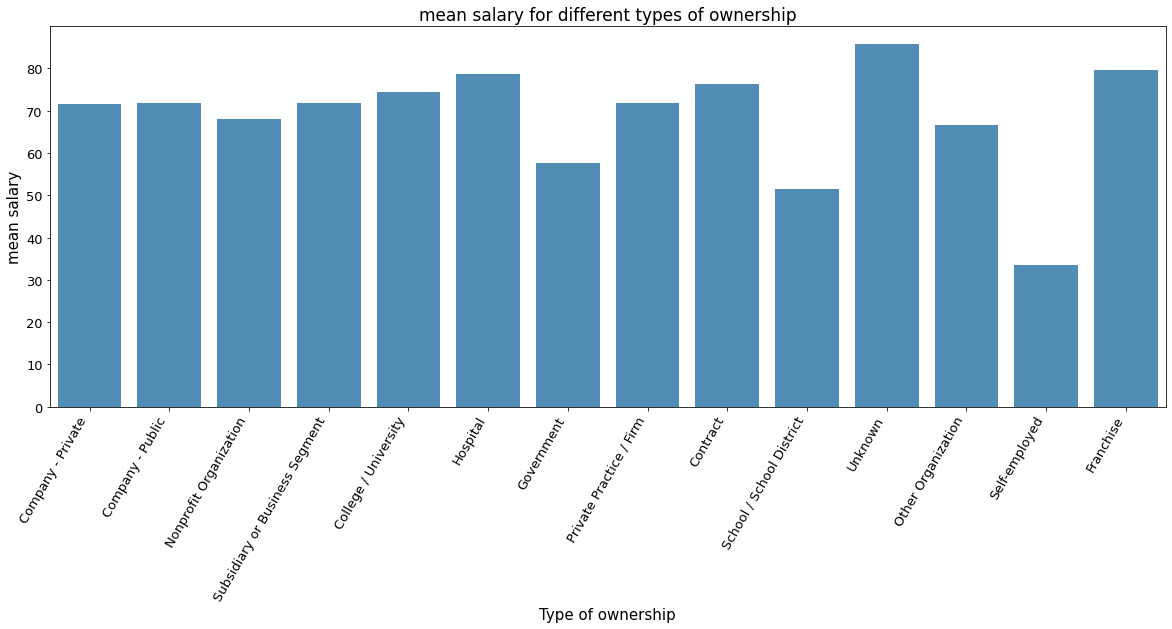

In [41]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=60,horizontalalignment='right')
sns.barplot(x=ownership_df['Type of ownership'],y=ownership_df['mean_salary'],color='#4090c5')
plt.title('mean salary for different types of ownership', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Type of ownership',fontsize=15)
plt.ylabel('mean salary',fontsize=15)

### Observations
Self employeed, School,and Government ownership has the least mean salary for a Data Analyst

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text major ticklabel objects>)

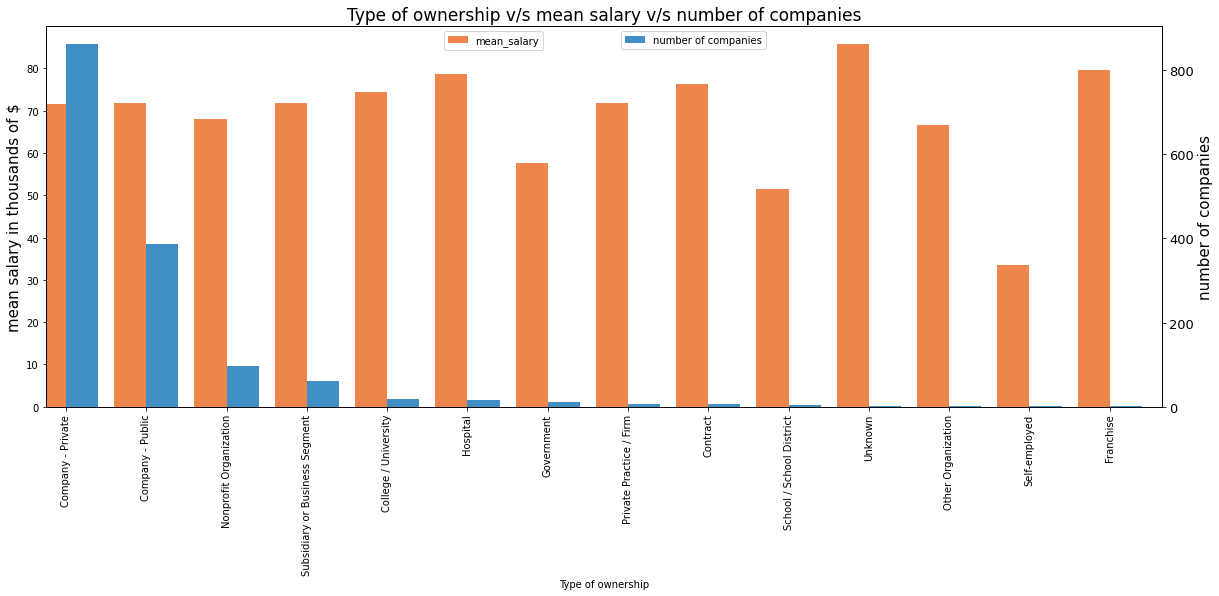

In [42]:
ownership_df_2=ownership_df.set_index('Type of ownership')
fig = plt.figure(figsize=(20,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

ownership_df_2['mean_salary'].plot(kind='bar', color='#ee854a', ax=ax, width=width, position=1)
ownership_df_2['value_counts'].plot(kind='bar', color='#4090c5', ax=ax2, width=width, position=0)

ax.set_ylabel('mean salary in thousands of $',fontsize=15)
ax.legend(['mean_salary'],bbox_to_anchor=(0.45, 1))
ax2.set_ylabel('number of companies',fontsize=15)
ax2.legend(['number of companies'],bbox_to_anchor=(0.65, 1))
plt.title("Type of ownership v/s mean salary v/s number of companies",fontsize=17)
plt.xlabel('Type of ownership',fontsize=15)
plt.yticks(fontsize=13)

In [43]:
sector_df=pd.DataFrame(temp_df['Sector'].value_counts()).reset_index()
sector_df.rename(columns={'index':'Sector','Sector':'value_counts'},inplace=True)
sector_salary=pd.DataFrame(temp_df.groupby('Sector')['mean_salary'].mean()).reset_index()
sector_df=pd.merge(sector_df,sector_salary,how='left',left_on="Sector",right_on='Sector')
sector_df_2=sector_df.set_index('Sector')

Text(0.5, 1.0, 'sector v/s mean salary v/s number of companies')

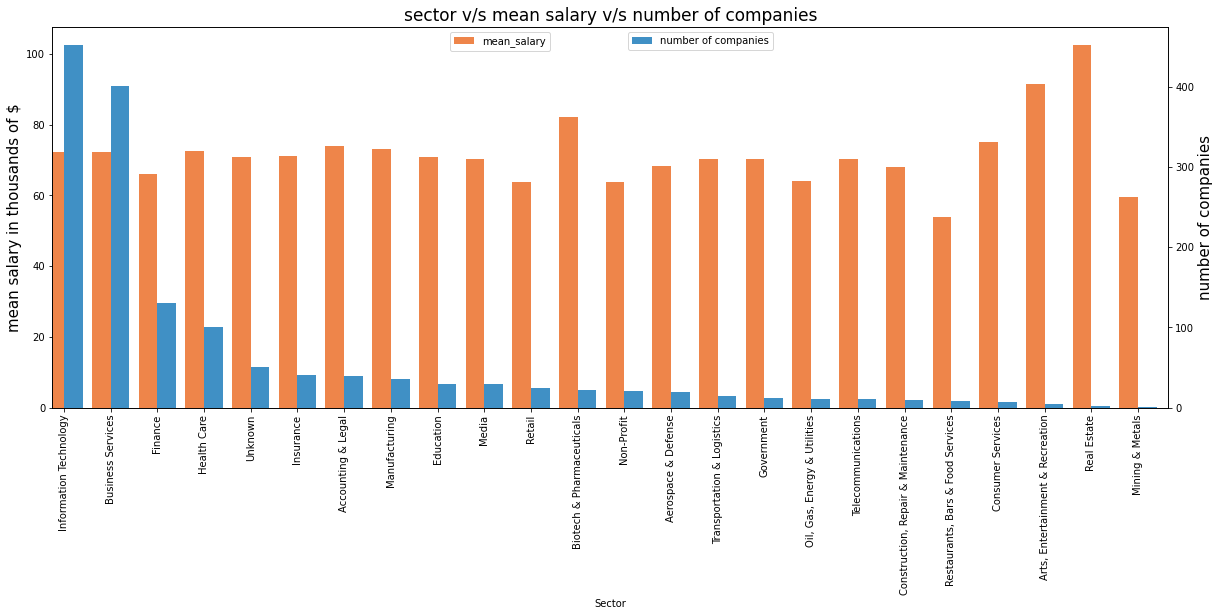

In [44]:
fig = plt.figure(figsize=(20,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

sector_df_2['mean_salary'].plot(kind='bar', color='#ee854a', ax=ax, width=width, position=1)
sector_df_2['value_counts'].plot(kind='bar', color='#4090c5', ax=ax2, width=width, position=0)

ax.set_ylabel('mean salary in thousands of $',fontsize=15)
ax.legend(['mean_salary'],bbox_to_anchor=(0.45, 1))
ax2.set_ylabel('number of companies',fontsize=15)
ax2.legend(['number of companies'],bbox_to_anchor=(0.65, 1))
plt.xlabel('Sector',fontsize=15)
plt.title("sector v/s mean salary v/s number of companies",fontsize=17)

### Observations
"Real Estate","Arts, Entertainment & Recreation", and "Biotech & Pharma" has the highest mean salary based on sector 

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

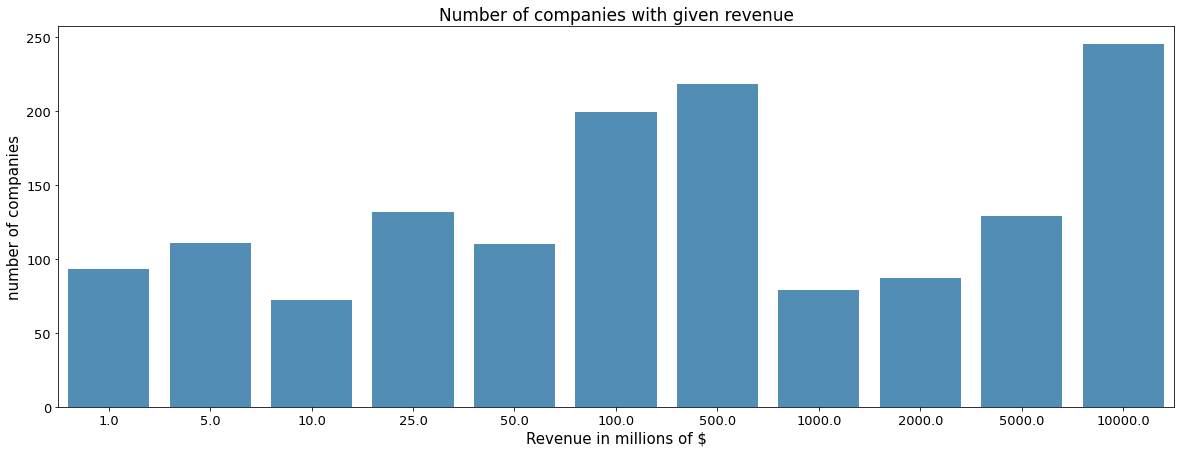

In [45]:
plt.figure(figsize=(20,7))
sns.countplot(df.loc[df['Max_revenue']!=0,'Max_revenue'],color='#4090c5')
plt.ylabel('number of companies',fontsize=15)
plt.xlabel("Revenue in millions of $",fontsize=15)
plt.title('Number of companies with given revenue',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [46]:
city_salary=pd.DataFrame(temp_df.groupby('City')['mean_salary'].mean()).reset_index()

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

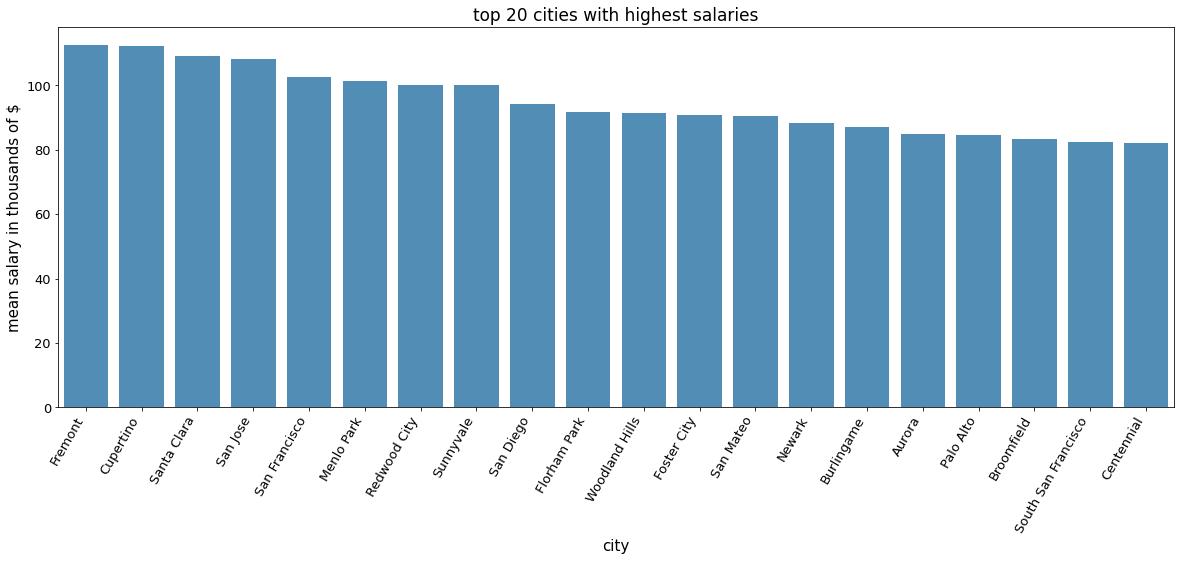

In [47]:
top_city_df=pd.DataFrame(df['City'].value_counts()).reset_index()
top_city_df.rename(columns={'City':'count','index':'city'},inplace=True)
top_city_df=pd.merge(top_city_df,city_salary,how='left',left_on='city',right_on='City')
top_city_df.drop('City',axis=1,inplace=True)
top_city_df=top_city_df[top_city_df['count']>=5]
top_city_df=top_city_df.sort_values(by='mean_salary',ascending=False)

top_city_df=top_city_df.head(20)
plt.figure(figsize=(20,7))
sns.barplot(x=top_city_df['city'],y=top_city_df['mean_salary'],color='#4090c5')
plt.xticks(rotation=60,horizontalalignment='right')
plt.ylabel('mean salary in thousands of $',fontsize=15)
plt.xlabel("city",fontsize=15)
plt.title('top 20 cities with highest salaries',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

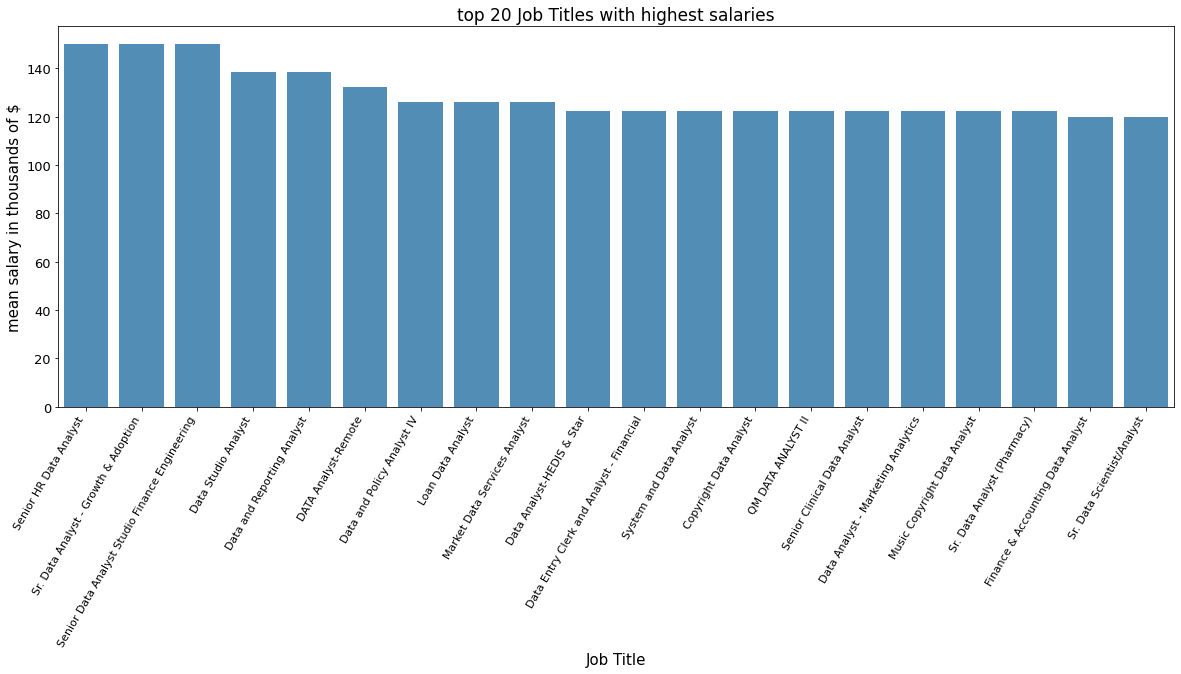

In [48]:
Title_salary=pd.DataFrame(temp_df.groupby('Job Title')['mean_salary'].mean()).reset_index().sort_values('mean_salary',ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(x=Title_salary['Job Title'].head(20),y=Title_salary['mean_salary'].head(20),color='#4090c5')
plt.xticks(rotation=60,horizontalalignment='right')
plt.ylabel('mean salary in thousands of $',fontsize=15)
plt.xlabel("Job Title",fontsize=15)
plt.title('top 20 Job Titles with highest salaries',fontsize=17)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000., 900000.]),
 <a list of 10 Text major ticklabel objects>)

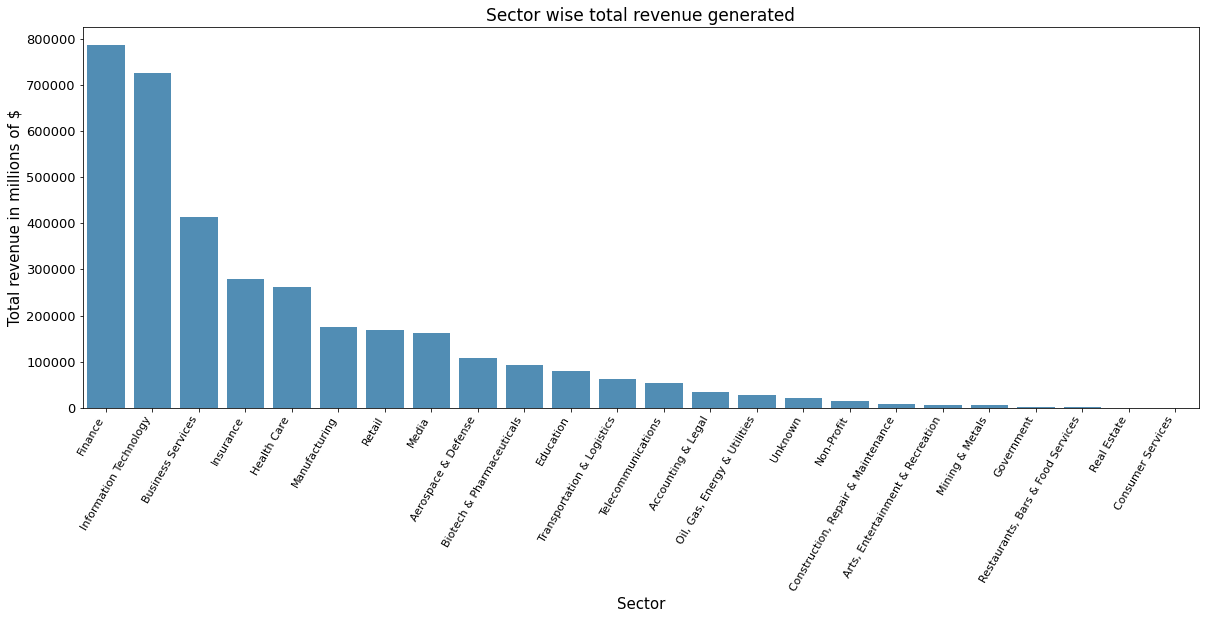

In [49]:
sector_revenue=pd.DataFrame(temp_df.groupby('Sector')['Max_revenue'].sum()).reset_index().sort_values('Max_revenue',ascending=False)
sector_revenue.rename(columns={'Max_revenue':"Total_revenue"},inplace=True)
plt.figure(figsize=(20,7))
sns.barplot(x=sector_revenue['Sector'],y=sector_revenue['Total_revenue'],color='#4090c5')
plt.xticks(rotation=60,horizontalalignment='right')
plt.ylabel('Total revenue in millions of $',fontsize=15)
plt.xlabel("Sector",fontsize=15)
plt.title('Sector wise total revenue generated',fontsize=17)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)

### Observations
Finance and IT sectors have the highest total revenues.

### If you like my work, please upvote this kernel since it will keep me motivated to perform more in-depth research on other datasets....